동일한 플로우로 여러 모델 활용하기
-> 데이터 도메인 추가하여 진행 (y 변수 윈저화 없이 진행)

# 데이터 및 라이브러리 불러와서 확인하기

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

font_fname = r'C:\Users\h2est\AppData\Local\Microsoft\Windows\Fonts\MaruBuri-SemiBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [2]:
import warnings
import pandas as pd

pd.set_option('display.max_row', 55)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
from sklearn import metrics
import numpy as np

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(len(preds[0])): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

# Feature tools로 변수 조작하기

In [4]:
# 설치 후 재시작 필요 (로컬에서는 한 번만)
# !pip install featuretools 
import featuretools as ft

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_single_value_features,
)

In [5]:
import os
from os.path import join as pjoin

data_dir = os.getcwd()

file_path = {
    'train_data' : pjoin(data_dir, 'train.csv'),
    'test_data' : pjoin(data_dir, 'test.csv')
}

In [6]:
current_path = os.getcwd()

# feature tools에서 조작을 위해 컬럼명 변경 진행 안하고 시작

train_df = pd.read_csv(file_path['train_data'])
test_df = pd.read_csv(file_path['test_data'])

# 훈련데이터 프레임 컬럼명을 바꿔주기
x_features = pd.read_csv(current_path + '/meta/x_feature_info.csv')['설명'].values
x_features = ['ID'] + list(x_features)
y_features = pd.read_csv(current_path + '/meta/y_feature_info.csv')['설명'].values
y_features = list(y_features)

# train_df = train_df.set_index(train_df.columns[0])
train_df.rename(columns= {c:"x_"+xf for c, xf in zip(train_df.columns[:len(x_features)], x_features)}, inplace=True)
train_df.rename(columns= {c:"y_"+yf for c, yf in zip(train_df.columns[len(x_features):], y_features)}, inplace=True)

# test_df = test_df.set_index(test_df.columns[0])
test_df.rename(columns= {c:"x_"+xf for c, xf in zip(test_df.columns[:len(x_features)], x_features)}, inplace=True)

train_df.rename(columns= {'x_ID':'ID'}, inplace=True)
test_df.rename(columns= {'x_ID':'ID'}, inplace=True)

train_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,1,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.41,-16.36,-17.03,21.20,20.99,21.28,21.09,0.29,1463,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,1,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.06,-16.11,-16.74,21.16,21.03,21.16,21.13,0.13,1463,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,1,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.16,-16.17,-16.76,21.13,21.03,21.17,21.12,0.14,1468,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,1,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.05,-16.03,-16.67,21.18,20.98,21.20,21.09,0.22,1469,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,1,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.25,-16.23,-16.85,21.16,20.96,21.18,21.10,0.22,1469,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [8]:
test_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,1,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,1,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,1,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,1,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.06,-16.13,-16.75,21.15,21.03,21.16,21.14,0.13,1469,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,1,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.06,-16.17,-16.76,21.15,21.08,21.12,21.17,0.09,1469,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


# Preprocessing

In [7]:
# 누름량이 소수가 나오기는 어렵다고 판단하여 소수값이 아닌 정수 값을 갖도록 바꿔주기
train_df[train_df.filter(regex='누름량').columns] = train_df.filter(regex='누름량').apply(lambda x: round(x)).astype(np.int32)
test_df[test_df.filter(regex='누름량').columns] = test_df.filter(regex='누름량').apply(lambda x: round(x)).astype(np.int32)

float_cols = train_df.dtypes[train_df.dtypes == 'float'].index
int_cols = train_df.dtypes[train_df.dtypes == 'int'].index
train_df[float_cols] = train_df[float_cols].astype(np.float32)
train_df[int_cols] = train_df[int_cols].astype(np.int32)

float_cols1 = test_df.dtypes[test_df.dtypes == 'float'].index
int_cols1 = test_df.dtypes[test_df.dtypes == 'int'].index
test_df[float_cols1] = test_df[float_cols1].astype(np.float32)
test_df[int_cols1] = test_df[int_cols1].astype(np.int32)

In [8]:
def check_outlier(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q1, q3 = np.quantile(data.iloc[:, column], 0.25), np.quantile(data.iloc[:, column], 0.75)          
    
    # IQR 계산하기     
    iqr = q3 - q1    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q1 - cut_off, q3 + cut_off      

    return lower, upper

from scipy.stats import mstats
def winsorize_outliers(data):
    return mstats.winsorize(data, limits=[0.05, 0.05], axis=0, nan_policy = 'propagate')

## preprocessing of train data

In [9]:
es = ft.EntitySet('train_data')
es = es.add_dataframe(
    dataframe_name = 'train_df',
    dataframe = train_df.drop(columns=['ID'], axis=1),
    index = train_df.columns[0],
)

es

Entityset: train_data
  DataFrames:
    train_df [Rows: 39607, Columns: 71]
  Relationships:
    No relationships

In [10]:
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name='train_df',
    features_only=False,
    agg_primitives=[],
    trans_primitives=['modulo_numeric_scalar'], #percentile: 데이터의 전체 비중에서 해당 데이터가 몇 % 차지하는지를 나타내는 것이므로 불필요하다 판단하여 진행 안함.
    verbose=True,
    primitive_options={ 
        'modulo_numeric_scalar': {
            "include_columns": {    # 해당 컬럼들은 반드시 포함하여 함수를 활용해 조합하기 위함.(specify dataframes and columns to include/ignore as groupings for inputs)
                "train_df": list(train_df.filter(regex='안착부|좌표').columns)
                },
            'ignore_columns' : {
                "train_df": list(train_df.filter(regex='y').columns)
                },
                # 새 변수 생성 시 해당 컬럼은 이용하지 않음을 미리 선언
                # control dataframes and columns that should be ignored for all primitives. 
                # This is useful for ignoring columns or dataframes that don’t relate to the problem or otherwise shouldn’t be included in the DFS run.
        },
    }
)
features

Built 74 features
Elapsed: 00:01 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [11]:
# 윈저라이징 기법으로 이상치 부분 처리 가능 (삭제 대신으로 사용할 수 있음)
# replace the outliers with other values. 
# Common is replacing the outliers on the upper side with 95% percentile value and outlier on the lower side with 5% percentile. 
# Z-score에서 표준편차가 3인 경우 일반적으로 많이 사용
  

# 최소, 최댓값 (상, 하한선 초과, 미만 값 => 윈저화값 변환)
for col in range(len(fm.filter(regex='x').columns)):
    lower, upper = check_outlier(fm, col)
    fm.filter(regex='x')[fm.filter(regex='x').iloc[:, col].apply(lambda x: x<lower or x>upper)] = fm.filter(regex='x')[fm.filter(regex='x').iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)

In [12]:
new_fm, new_features = remove_single_value_features(fm, features=features)
set(features) - set(new_features)

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>}

In [13]:
# 카테고리컬 데이터로 구분하여 확인하기
cols = new_fm.columns; cnt_vc = {c: len(new_fm[c].value_counts()) for c in cols if len(new_fm[c].value_counts()) <= 10}
idx_nm = pd.DataFrame.from_dict(cnt_vc, columns = ['values'], orient='index').index
for nm in idx_nm:
    print(new_fm[nm].value_counts())

102    27282
103    12325
Name: x_PCB 체결 시 단계별 누름량(Step 3), dtype: int64
0.0    39575
2.9       12
3.0       12
3.3        4
3.1        2
3.6        1
3.2        1
Name: x_방열 재료 2 무게, dtype: int64
0.0    39580
0.5       12
0.6       11
0.4        3
0.7        1
Name: x_방열 재료 3 무게, dtype: int64


In [14]:
# cols = new_fm.columns; cnt_vc = {c: len(new_fm[c].value_counts()) for c in cols if len(new_fm[c].value_counts()) <= 5}
# idx_nm = pd.DataFrame.from_dict(cnt_vc, columns = ['values'], orient='index').index
for nm in idx_nm:
    max_imbal = new_fm[nm].value_counts()[new_fm[nm].value_counts().values == max(new_fm[nm].value_counts())].index
    new_fm[nm][new_fm[nm].apply(lambda x: x==max_imbal[0])] = np.nan

new_fm[idx_nm].isnull().sum()

x_PCB 체결 시 단계별 누름량(Step 3)    27282
x_방열 재료 2 무게                  39575
x_방열 재료 3 무게                  39580
dtype: int64

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
mice_imp = IterativeImputer(estimator=lr_model,missing_values=np.nan, max_iter=15,random_state=2022)
new_fm[idx_nm] = mice_imp.fit_transform(new_fm[idx_nm])
new_fm[idx_nm].isnull().sum()

x_PCB 체결 시 단계별 누름량(Step 3)    0
x_방열 재료 2 무게                  0
x_방열 재료 3 무게                  0
dtype: int64

In [18]:
for nm in idx_nm:
    print(new_fm[nm].value_counts())

103.0    39607
Name: x_PCB 체결 시 단계별 누름량(Step 3), dtype: int64
3.03125    39575
2.90000       12
3.00000       12
3.30000        4
3.10000        2
3.60000        1
3.20000        1
Name: x_방열 재료 2 무게, dtype: int64
0.538848    39575
0.500000       12
0.600000       11
0.400000        3
0.592772        2
0.512514        2
0.700000        1
0.532578        1
Name: x_방열 재료 3 무게, dtype: int64


In [16]:
new_fm, new_features = remove_highly_correlated_features(
    new_fm, features=new_features, pct_corr_threshold=0.90,features_to_check = list(new_fm.filter(regex='x').columns),  
    features_to_keep = list(new_fm.filter(regex='y').columns)
)
set(features) - set(new_features) 

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_커넥터 위치 기준 좌표 % 1>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>}

In [17]:
from featuretools.selection import remove_low_information_features
new_fm, new_features = remove_low_information_features(new_fm, features=new_features)
set(features) - set(new_features) 

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_커넥터 위치 기준 좌표 % 1>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>}

In [18]:
avg_rpm = [np.mean(new_fm.iloc[i].filter(regex = '회전수')) for i in range(len(new_fm))]
new_fm['x_스크류 체결 시 분당 회전수(평균)'] = avg_rpm
new_fm[new_fm.filter(regex='대기 시간').columns] = new_fm.filter(regex='대기 시간').apply(lambda x:round(x//3600)).astype(np.int32)
new_fm.drop(columns = new_fm.filter(regex = '회전수').columns[:-1], axis=1, inplace=True)
new_fm.drop(columns = new_fm.filter(regex = '차이|기울기').columns, axis=1, inplace=True)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

rb_scaler = RobustScaler()
new_fm[new_fm.filter(regex='납 량|소요량|면적').columns] = rb_scaler.fit_transform(new_fm.filter(regex='납 량|소요량|면적'))

mms = MinMaxScaler()
new_fm[['x_방열 재료 1 무게']] = mms.fit_transform(new_fm[['x_방열 재료 1 무게']])
new_fm.drop(columns = ['x_방열 재료 2 무게', 'x_방열 재료 3 무게', 'x_하우징 PCB 안착부 1 치수','x_하우징 PCB 안착부 2 치수','x_하우징 PCB 안착부 3 치수'], axis=1, inplace=True)

In [19]:
new_fm, new_features = remove_single_value_features(new_fm, features=new_features)
set(features) - set(new_features)

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_하우징 PCB 안착부 2 치수>,
 <Feature: x_하우징 PCB 안착부 1 치수>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_커넥터 위치 기준 좌표 % 1>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_하우징 PCB 안착부 3 치수>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>}

## preprocessing of test data

In [20]:
es1 = ft.EntitySet('test_data')
es1 = es1.add_dataframe(
    dataframe_name = 'test_df',
    dataframe = test_df.drop(columns=['ID'], axis=1),
    index = test_df.columns[0],
)

es1

Entityset: test_data
  DataFrames:
    test_df [Rows: 39608, Columns: 57]
  Relationships:
    No relationships

In [21]:
fm1, features1 = ft.dfs(
    entityset=es1,
    target_dataframe_name='test_df',
    features_only=False,
    agg_primitives=[],
    trans_primitives=['modulo_numeric_scalar'], # modulo_numeric_scalar: 각 요소별 나머지를 스칼라 형태로 연산
    verbose=True,
    primitive_options={ 
        'modulo_numeric_scalar': {
            "include_columns": {    # 해당 컬럼들은 반드시 포함하여 함수를 활용해 조합하기 위함.(specify dataframes and columns to include/ignore as groupings for inputs)
                "test_df": list(test_df.filter(regex='안착부').columns)
            },
        },
    }
)
features1

Built 59 features
Elapsed: 00:01 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [22]:
for col in range(len(fm1.columns)):
    lower, upper = check_outlier(fm1, col)
    fm1[fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)] = fm1[fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)
fm1.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_하우징 PCB 안착부 1 치수 % 1,x_하우징 PCB 안착부 2 치수 % 1,x_하우징 PCB 안착부 3 치수 % 1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,103,76.669998,1,102,74,30.510000,63.570000,239.800003,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,1,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,12.96,12.95,12.97,12.88,-16.17,-16.170000,-16.84,21.219999,21.059999,21.209999,21.200001,0.16,1469,1,1,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,0.83,0.83,0.160000
1,67,103,69.370003,1,102,68,28.030001,116.989998,189.229996,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,1,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.280000,-16.01,21.209999,21.000000,21.260000,21.150000,0.23,1462,1,1,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,0.65,0.75,0.889999
2,70,103,68.970001,1,102,74,29.650000,205.679993,214.929993,0.0,0.0,4.40,0.19,13.33,13.35,13.41,13.52,13.42,3.10,3.12,3.05,3.17,1,2.13,2.10,2.14,2.15,2.18,2.26,1.40,1.66,1.38,1.71,12.93,12.90,13.01,13.00,-16.26,-16.280001,-16.91,21.160000,21.049999,21.150000,21.190001,0.14,1469,1,1,14860.830078,122.861977,123.571877,132.099915,120.794556,130.051712,129.381744,120.615005,0.73,0.65,0.080000


In [23]:
new_fm1, new_features1 = remove_single_value_features(fm1, features=features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_하우징 PCB 안착부 1 치수 % 1,x_하우징 PCB 안착부 2 치수 % 1,x_하우징 PCB 안착부 3 치수 % 1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,76.669998,102,74,30.510000,63.570000,239.800003,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,12.96,12.95,12.97,12.88,-16.170000,-16.170000,-16.840000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,0.830000,0.830000,0.160000
1,67,69.370003,102,68,28.030001,116.989998,189.229996,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,-15.280000,-16.010000,21.209999,21.000000,21.260000,21.150000,0.23,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,0.650000,0.750000,0.889999
2,70,68.970001,102,74,29.650000,205.679993,214.929993,0.0,0.0,4.40,0.19,13.33,13.35,13.41,13.52,13.42,3.10,3.12,3.05,3.17,2.13,2.10,2.14,2.15,2.18,2.26,1.40,1.66,1.38,1.71,12.93,12.90,13.01,13.00,-16.260000,-16.280001,-16.910000,21.160000,21.049999,21.150000,21.190001,0.14,1469,14860.830078,122.861977,123.571877,132.099915,120.794556,130.051712,129.381744,120.615005,0.730000,0.650000,0.080000
3,70,65.870003,102,74,28.150000,103.379997,180.800003,0.0,0.0,4.39,0.18,13.33,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.48,1.65,1.46,1.86,12.99,12.98,12.91,12.96,-16.059999,-16.129999,-16.750000,21.150000,21.030001,21.160000,21.139999,0.13,1469,15252.530273,133.994690,125.331306,147.258652,123.142654,125.963661,139.666595,126.589256,0.940001,0.870001,0.250000
4,73,66.669998,102,75,29.110001,89.320000,229.630005,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.85,12.99,13.00,-16.059999,-16.170000,-16.760000,21.150000,21.080000,21.150000,21.170000,0.09,1469,10752.230469,137.918198,135.116196,138.600479,127.173035,136.161285,134.411331,124.020020,0.940001,0.830000,0.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,69,63.970001,103,69,29.490000,116.349998,284.160004,0.0,0.0,4.35,0.14,13.38,13.37,13.48,13.51,13.45,3.16,3.06,3.07,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.170000,-16.260000,-16.879999,21.160000,21.120001,21.240000,21.190001,0.11,1469,48545.828125,127.741249,126.494308,139.119904,125.271111,128.284576,140.176941,128.292847,0.830000,0.740000,0.120001
39604,69,62.970001,103,69,30.780001,116.279999,272.410004,0.0,0.0,4.34,0.16,13.37,13.38,13.47,13.53,13.46,3.18,3.03,3.09,3.08,2.07,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.110001,-16.100000,-16.730000,21.160000,21.030001,21.219999,21.120001,0.19,1469,48545.828125,127.767380,124.062813,138.238663,119.879395,127.322533,137.312042,131.570618,0.889999,0.900000,0.270000
39605,70,63.669998,103

In [24]:
# 카테고리컬 데이터로 구분하여 확인하기

cols = new_fm1.columns; cnt_vc_test = {c: len(new_fm1[c].value_counts()) for c in cols if len(new_fm1[c].value_counts()) <= 10}
idx_nm_test = pd.DataFrame.from_dict(cnt_vc_test, columns = ['values'], orient='index').index

for nm in idx_nm:
    print(new_fm1[nm].value_counts())

102    27297
103    12311
Name: x_PCB 체결 시 단계별 누름량(Step 3), dtype: int64
0.0    39604
2.9        2
3.0        1
3.1        1
Name: x_방열 재료 2 무게, dtype: int64
0.0    39604
0.6        2
0.4        1
0.5        1
Name: x_방열 재료 3 무게, dtype: int64


In [25]:
# cols = new_fm1.columns; cnt_vc_test = {c: len(new_fm1[c].value_counts()) for c in cols if len(new_fm1[c].value_counts()) <= 5}
# idx_nm_test = pd.DataFrame.from_dict(cnt_vc_test, columns = ['values'], orient='index').index

for nm in idx_nm:
    max_imbal = new_fm1[nm].value_counts()[new_fm1[nm].value_counts().values == max(new_fm1[nm].value_counts())].index
    new_fm1[nm][new_fm1[nm].apply(lambda x: x==max_imbal[0])] = np.nan
    
new_fm1[idx_nm].isnull().sum()

x_PCB 체결 시 단계별 누름량(Step 3)    27297
x_방열 재료 2 무게                  39604
x_방열 재료 3 무게                  39604
dtype: int64

In [26]:
new_fm1[idx_nm] = mice_imp.fit_transform(new_fm1[idx_nm])
new_fm1[idx_nm].isnull().sum()

x_PCB 체결 시 단계별 누름량(Step 3)    0
x_방열 재료 2 무게                  0
x_방열 재료 3 무게                  0
dtype: int64

In [30]:
for nm in idx_nm:
    print(new_fm1[nm].value_counts())

103.0    39608
Name: x_PCB 체결 시 단계별 누름량(Step 3), dtype: int64
2.975    39604
2.900        2
3.000        1
3.100        1
Name: x_방열 재료 2 무게, dtype: int64
0.525    39604
0.600        2
0.400        1
0.500        1
Name: x_방열 재료 3 무게, dtype: int64


In [27]:
# 테스트 데이터에도 동일 방식 적용
new_fm1, new_features1 = remove_highly_correlated_features(
    new_fm1, features=new_features1, pct_corr_threshold=0.90, features_to_check = list(new_fm1.filter(regex='x').columns), 
)
set(features) - set(new_features) 

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_하우징 PCB 안착부 2 치수>,
 <Feature: x_하우징 PCB 안착부 1 치수>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_커넥터 위치 기준 좌표 % 1>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_하우징 PCB 안착부 3 치수>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>}

In [28]:
new_fm1, new_features1 = remove_single_value_features(new_fm1, features=new_features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_하우징 PCB 안착부 1 치수 % 1,x_하우징 PCB 안착부 2 치수 % 1,x_하우징 PCB 안착부 3 치수 % 1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,76.669998,74,30.510000,63.570000,239.800003,2.975,0.525,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,12.96,12.95,12.97,12.88,-16.170000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,0.830000,0.830000,0.160000
1,67,69.370003,68,28.030001,116.989998,189.229996,2.975,0.525,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,21.209999,21.000000,21.260000,21.150000,0.23,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,0.650000,0.750000,0.889999
2,70,68.970001,74,29.650000,205.679993,214.929993,2.975,0.525,4.40,0.19,13.33,13.35,13.41,13.52,13.42,3.10,3.12,3.05,3.17,2.13,2.10,2.14,2.15,2.18,2.26,1.40,1.66,1.38,1.71,12.93,12.90,13.01,13.00,-16.260000,21.160000,21.049999,21.150000,21.190001,0.14,1469,14860.830078,122.861977,123.571877,132.099915,120.794556,130.051712,129.381744,120.615005,0.730000,0.650000,0.080000
3,70,65.870003,74,28.150000,103.379997,180.800003,2.975,0.525,4.39,0.18,13.33,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.48,1.65,1.46,1.86,12.99,12.98,12.91,12.96,-16.059999,21.150000,21.030001,21.160000,21.139999,0.13,1469,15252.530273,133.994690,125.331306,147.258652,123.142654,125.963661,139.666595,126.589256,0.940001,0.870001,0.250000
4,73,66.669998,75,29.110001,89.320000,229.630005,2.975,0.525,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.85,12.99,13.00,-16.059999,21.150000,21.080000,21.150000,21.170000,0.09,1469,10752.230469,137.918198,135.116196,138.600479,127.173035,136.161285,134.411331,124.020020,0.940001,0.830000,0.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,69,63.970001,69,29.490000,116.349998,284.160004,2.975,0.525,4.35,0.14,13.38,13.37,13.48,13.51,13.45,3.16,3.06,3.07,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.170000,21.160000,21.120001,21.240000,21.190001,0.11,1469,48545.828125,127.741249,126.494308,139.119904,125.271111,128.284576,140.176941,128.292847,0.830000,0.740000,0.120001
39604,69,62.970001,69,30.780001,116.279999,272.410004,2.975,0.525,4.34,0.16,13.37,13.38,13.47,13.53,13.46,3.18,3.03,3.09,3.08,2.07,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.110001,21.160000,21.030001,21.219999,21.120001,0.19,1469,48545.828125,127.767380,124.062813,138.238663,119.879395,127.322533,137.312042,131.570618,0.889999,0.900000,0.270000
39605,70,63.669998,70,30.000000,113.050003,294.230011,2.975,0.525,4.38,0.16,13.36,13.36,13.46,13.52,13.44,3.18,3.04,3.09,3.08,2.11,2.13,2.06,2.11,2.12,2.18,1.40,1.62,1.35,1.72,12.99,12.88,13.01,12.85,-16.230000,21.160000,21.110001,21.230000,21.170000,0.12,

In [29]:
new_fm1, new_features1 = remove_low_information_features(new_fm1, features=new_features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_하우징 PCB 안착부 1 치수 % 1,x_하우징 PCB 안착부 2 치수 % 1,x_하우징 PCB 안착부 3 치수 % 1
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,76.669998,74,30.510000,63.570000,239.800003,2.975,0.525,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,12.96,12.95,12.97,12.88,-16.170000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688,0.830000,0.830000,0.160000
1,67,69.370003,68,28.030001,116.989998,189.229996,2.975,0.525,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,21.209999,21.000000,21.260000,21.150000,0.23,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619,0.650000,0.750000,0.889999
2,70,68.970001,74,29.650000,205.679993,214.929993,2.975,0.525,4.40,0.19,13.33,13.35,13.41,13.52,13.42,3.10,3.12,3.05,3.17,2.13,2.10,2.14,2.15,2.18,2.26,1.40,1.66,1.38,1.71,12.93,12.90,13.01,13.00,-16.260000,21.160000,21.049999,21.150000,21.190001,0.14,1469,14860.830078,122.861977,123.571877,132.099915,120.794556,130.051712,129.381744,120.615005,0.730000,0.650000,0.080000
3,70,65.870003,74,28.150000,103.379997,180.800003,2.975,0.525,4.39,0.18,13.33,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.48,1.65,1.46,1.86,12.99,12.98,12.91,12.96,-16.059999,21.150000,21.030001,21.160000,21.139999,0.13,1469,15252.530273,133.994690,125.331306,147.258652,123.142654,125.963661,139.666595,126.589256,0.940001,0.870001,0.250000
4,73,66.669998,75,29.110001,89.320000,229.630005,2.975,0.525,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.85,12.99,13.00,-16.059999,21.150000,21.080000,21.150000,21.170000,0.09,1469,10752.230469,137.918198,135.116196,138.600479,127.173035,136.161285,134.411331,124.020020,0.940001,0.830000,0.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,69,63.970001,69,29.490000,116.349998,284.160004,2.975,0.525,4.35,0.14,13.38,13.37,13.48,13.51,13.45,3.16,3.06,3.07,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.170000,21.160000,21.120001,21.240000,21.190001,0.11,1469,48545.828125,127.741249,126.494308,139.119904,125.271111,128.284576,140.176941,128.292847,0.830000,0.740000,0.120001
39604,69,62.970001,69,30.780001,116.279999,272.410004,2.975,0.525,4.34,0.16,13.37,13.38,13.47,13.53,13.46,3.18,3.03,3.09,3.08,2.07,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.110001,21.160000,21.030001,21.219999,21.120001,0.19,1469,48545.828125,127.767380,124.062813,138.238663,119.879395,127.322533,137.312042,131.570618,0.889999,0.900000,0.270000
39605,70,63.669998,70,30.000000,113.050003,294.230011,2.975,0.525,4.38,0.16,13.36,13.36,13.46,13.52,13.44,3.18,3.04,3.09,3.08,2.11,2.13,2.06,2.11,2.12,2.18,1.40,1.62,1.35,1.72,12.99,12.88,13.01,12.85,-16.230000,21.160000,21.110001,21.230000,21.170000,0.12,

In [30]:
avg_rpm = [np.mean(new_fm1.iloc[i].filter(regex = '회전수')) for i in range(len(new_fm1))]
new_fm1['x_스크류 체결 시 분당 회전수(평균)'] = avg_rpm
new_fm1[new_fm1.filter(regex='대기 시간').columns] = new_fm1.filter(regex='대기 시간').apply(lambda x:round(x//3600)).astype(np.int32)
new_fm1.drop(columns = new_fm1.filter(regex = '회전수').columns[:-1], axis=1, inplace=True)
new_fm1.drop(columns = new_fm1.filter(regex = '차이|기울기').columns, axis=1, inplace=True)


rb_scaler = RobustScaler()
new_fm1[new_fm1.filter(regex='납 량|소요량|면적').columns] = rb_scaler.fit_transform(new_fm1.filter(regex='납 량|소요량|면적'))

mms = MinMaxScaler()
new_fm1[['x_방열 재료 1 무게']] = mms.fit_transform(new_fm1[['x_방열 재료 1 무게']])
new_fm1.drop(columns = ['x_방열 재료 2 무게', 'x_방열 재료 3 무게', 'x_하우징 PCB 안착부 1 치수'], axis=1, inplace=True)

In [31]:
new_fm1, new_features1 = remove_single_value_features(new_fm1, features=new_features1)
set(features1) - set(new_features1)

{<Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_하우징 PCB 안착부 3 치수>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_하우징 PCB 안착부 1 치수>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_하우징 PCB 안착부 2 치수>}

# LOF로 데이터 이상치 탐지 확인하기 -> 시간이 다소 소요되므로 pass

In [46]:
# fm_df[fm_df.filter(regex='% 1').columns] = fm_df.filter(regex='% 1').apply(lambda x: x*100)
# new_fm1[new_fm1.filter(regex='% 1').columns] = new_fm1.filter(regex='% 1').apply(lambda x: x*100)

In [32]:
for col in range(len(new_fm.filter(regex='x').columns)):
    lower, upper = check_outlier(new_fm, col)
    new_fm.filter(regex='x')[new_fm.filter(regex='x').iloc[:, col].apply(lambda x: x<lower or x>upper)] = new_fm.filter(regex='x')[new_fm.filter(regex='x').iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)

for col in range(len(new_fm1.columns)):
    lower, upper = check_outlier(new_fm1, col)
    new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)] = new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)

In [33]:
train_x = new_fm.drop(columns = new_fm.filter(regex='y').columns, axis=1)
train_y = new_fm.filter(regex='y')

fm_df = pd.concat([train_x, train_y], axis=1)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_하우징 PCB 안착부 1 치수 % 1,x_하우징 PCB 안착부 2 치수 % 1,x_하우징 PCB 안착부 3 치수 % 1,x_스크류 체결 시 분당 회전수(평균),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,71,0.336391,75,0.308081,-1.977469,0.149297,4.34,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,21.200001,20.990000,21.280001,21.090000,-6.0,2,0.832657,0.534110,1.131925,0.868768,-0.367225,-0.141618,-0.505029,0.590000,0.639999,0.969999,12.9375,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,70,0.266055,73,-0.055556,-2.020654,-0.011138,4.38,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,21.160000,21.030001,21.160000,21.129999,-6.0,2,0.396990,0.616845,1.385568,-0.605928,-0.030251,0.650943,-0.527542,0.940001,0.889999,0.260000,12.9025,1.446,1.184,1.268,18.507,33.179001,16.736,3.229,-26.618999,-26.523001,-22.573999,24.691,-26.253000,-26.497,-26.438000
2,73,0.232416,73,-0.015152,-0.348104,0.500531,4.36,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,21.129999,21.030001,21.170000,21.120001,-1.0,3,0.274259,-0.039661,1.007533,0.126871,-0.160030,0.299524,-0.921137,0.840000,0.830000,0.240000,12.9275,1.251,0.665,0.782,14.082,31.801001,17.080,2.839,-26.238001,-26.216000,-22.169001,24.649,-26.285000,-26.215,-26.370001


In [49]:
train_x.shape, train_y.shape

((39607, 43), (39607, 14))

In [53]:
rc = np.random.randint(1, len(fm_df.columns), size=4)
rc

array([18, 12, 51, 40])

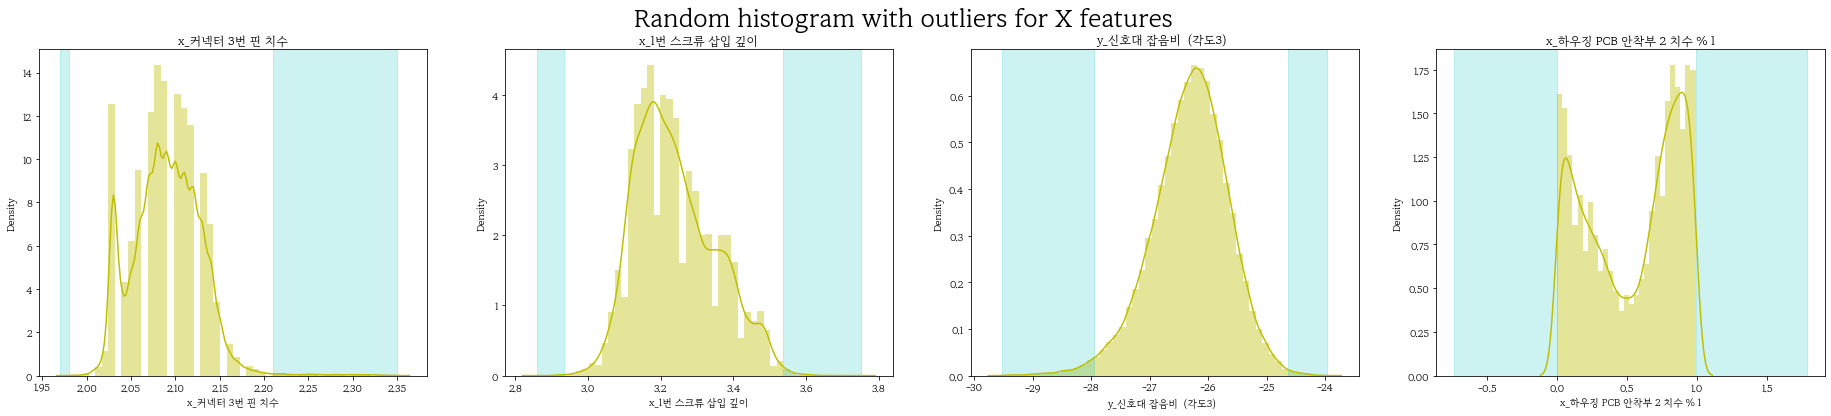

In [54]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 선별한 4개의 컬럼에 대해 이상치 영역 확인 (윈저화 이후 컬럼별)

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = rc[0]
lower, upper = check_outlier(fm_df, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(fm_df.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, fm_df.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, fm_df.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(fm_df.columns[rc1])


rc2= rc[1]
lower, upper = check_outlier(fm_df, rc2)

sns.distplot(fm_df.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, fm_df.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, fm_df.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(fm_df.columns[rc2])


rc3 = rc[2]
lower, upper = check_outlier(fm_df, rc3)

sns.distplot(fm_df.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, fm_df.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, fm_df.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(fm_df.columns[rc3])


rc4 = rc[3]
lower, upper = check_outlier(fm_df, rc4)

sns.distplot(fm_df.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, fm_df.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, fm_df.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(fm_df.columns[rc4])

plt.show()


# 여러 모델로 stacking 성능확인하기

In [34]:
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [37]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor

gbr = GradientBoostingRegressor(max_depth= 10, n_estimators= 30, criterion="mse",learning_rate =0.01, random_state=2022)
xgbr = XGBRegressor(n_estimators= 30, learning_rate =0.01, random_state=2022, n_jobs = 5) 
rfr = RandomForestRegressor(max_depth= 10, n_estimators= 30, criterion="mse", random_state=2022)
bgr = BaggingRegressor(n_estimators= 30, n_jobs = 5, random_state=2022)
lgbmr = LGBMRegressor(max_depth= 10, n_estimators= 30, learning_rate =0.01, random_state=2022)
# etr = ExtraTreesRegressor(n_estimators= 50, random_state=2022, n_jobs = 10)
# cbr = CatBoostRegressor(eval_metric='RMSE', max_depth= 16, n_estimators= 50, learning_rate = 0.01, random_state=2022)

In [58]:
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
estimators = [('gbr',gbr),('xgb',xgbr),('br',bgr),('lgb',lgbmr),('rfr',rfr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=lgbmr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [59]:
print(f'R2 score of RF (training): {round(model.score(X_train, y_train), 3)}')
print(f'R2 score of RF (validation): {round(model.score(X_val, y_val), 3)}')

R2 score of RF (training): 0.072
R2 score of RF (validation): 0.029


In [60]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4518
Done.


In [61]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.959
lg_nrmse of LR (validation): 1.969


In [62]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

In [63]:
submission = pd.read_csv('./sample_submission.csv')

for idx, col in enumerate(submission.columns):
    if col=='ID': continue#submission[col] = new_fm1.index
    submission[col] = preds_test[:,idx-1]

submission.to_csv('./submit_after_treating_outliers_stacking.csv', index=False, encoding='utf-8')
print('Done.')

Done.


In [64]:
pd.read_csv('./submit_after_treating_outliers_stacking.csv')

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.371078,1.070980,1.029417,13.678031,31.124330,16.533201,3.142586,-26.260204,-26.269969,-22.398177,24.323886,-26.212092,-26.181447,-26.199533
1,TEST_00002,1.367195,1.085631,1.053316,13.678031,31.307924,16.570782,3.158141,-26.232640,-26.250473,-22.356063,24.374232,-26.174214,-26.163908,-26.207629
2,TEST_00003,1.362181,1.060288,1.019365,13.353759,31.311574,16.558586,3.149192,-26.292400,-26.309788,-22.352169,24.378070,-26.217333,-26.228833,-26.227514
3,TEST_00004,1.362847,1.060439,1.014462,14.106905,31.504437,16.698378,3.126766,-26.153004,-26.170427,-22.304087,24.477963,-26.083663,-26.103859,-26.058413
4,TEST_00005,1.361425,1.050435,1.011508,14.061220,31.504437,16.698378,3.108894,-26.130977,-26.170427,-22.385049,24.476285,-26.072415,-26.069750,-26.058413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,TEST_39604,1.332771,1.025437,0.992132,13.471994,31.297967,16.566204,3.150780,-26.359696,-26.380847,-22.546876,24.264026,-26.328275,-26.301069,-26.304097
39604,TEST_39605,1.336716,1.019761,0.986644,13.501662,31.353096,16.515677,3.159351,-26.359696,-26.374664,-22.547654,24.296288,-26.289687,-26.297085,-26.309605
39605,TEST_39606,1.326068,1.041665,1.011654,13.457739,31.311574,16.549218,3.148115,-26.381929,-26.372055,-22.551980,24.313473,-26.328336,-26.287885,-26.323042
39606,TEST_39607,1.324784,1.001428,0.994966,13.517170,31.323368,16.533201,3.159457,-26.348441,-26.378541,-22.553838,24.290518,-26.289687,-26.305147,-26.336317


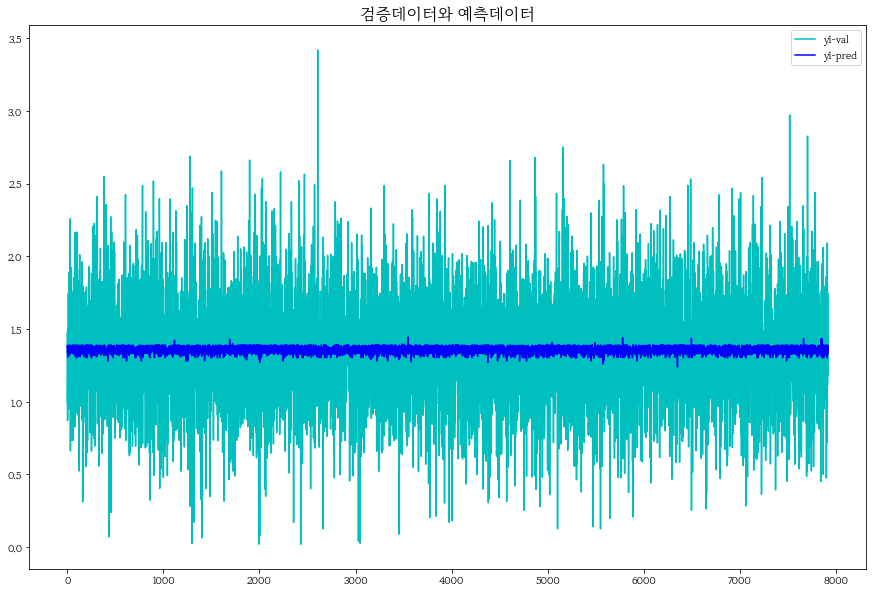

In [65]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

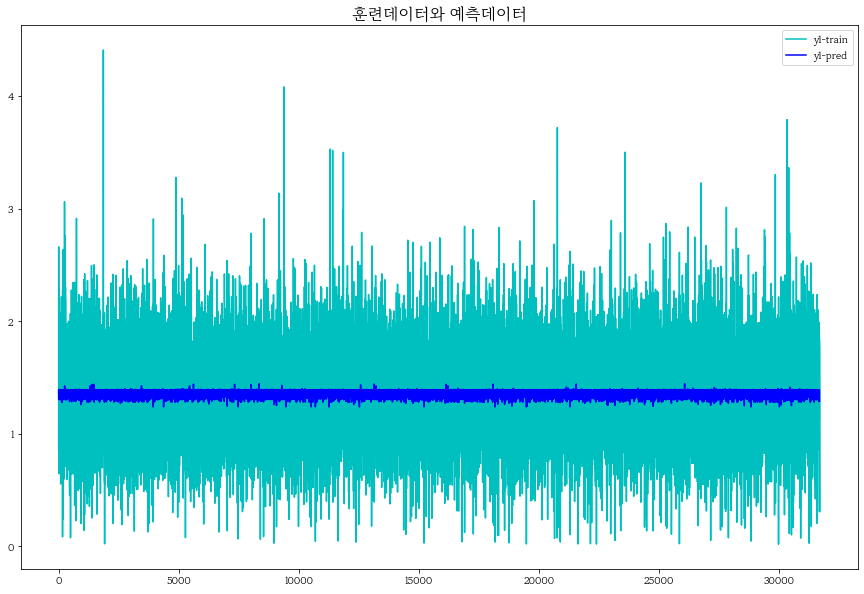

In [66]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

# 추가적으로 모델링 다시

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [68]:
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
estimators = [('gbr',gbr),('xgb',xgbr),('br',bgr),('lgb',lgbmr),('rfr',rfr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=xgbr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [69]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:238.0848
Done.


In [70]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 10.687
lg_nrmse of LR (validation): 10.687


In [71]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

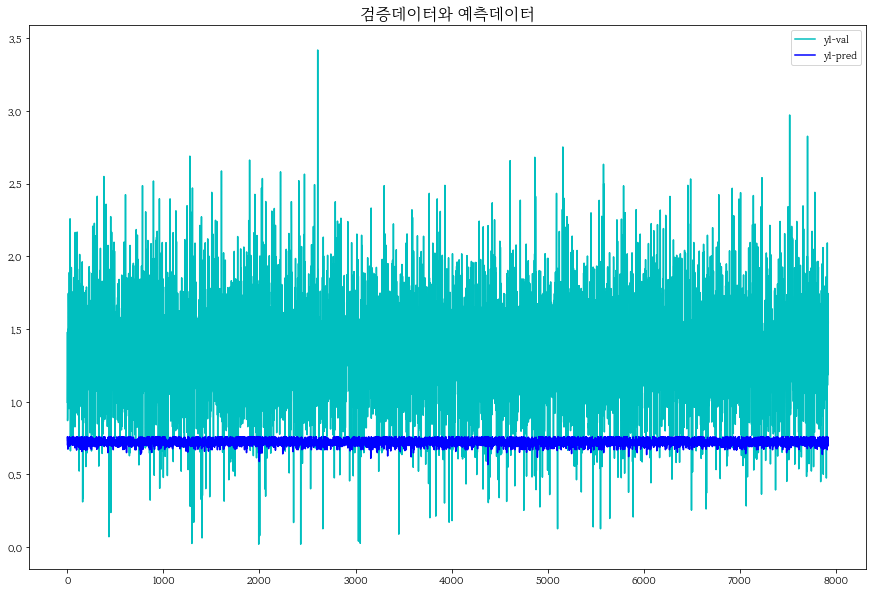

In [72]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

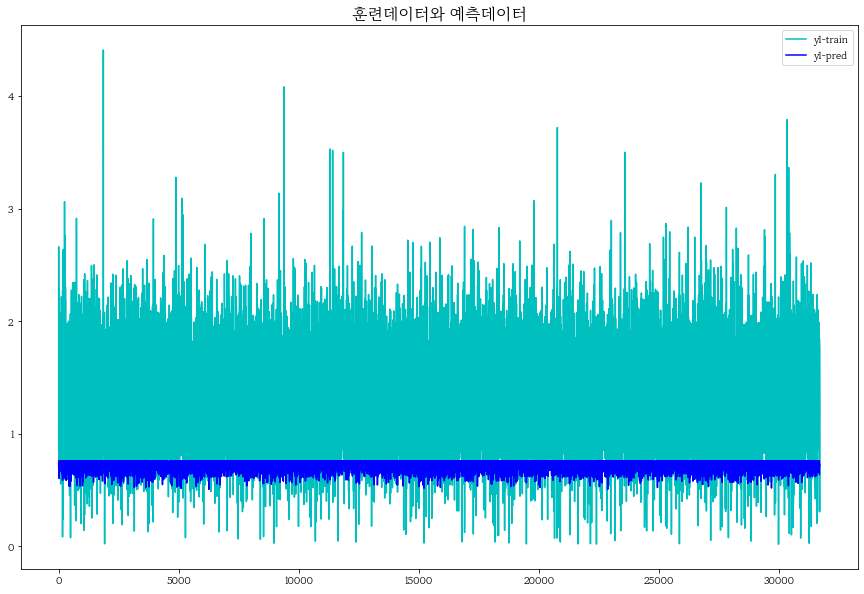

In [73]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

## final estimator를 다른 모델로 해서 확인하기

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
estimators = [('gbr',gbr),('xgb',xgbr),('br',bgr),('lgb',lgbmr),('rfr',rfr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=rfr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

In [ ]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4235
Done.


In [ ]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.787
lg_nrmse of LR (validation): 1.946


In [ ]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

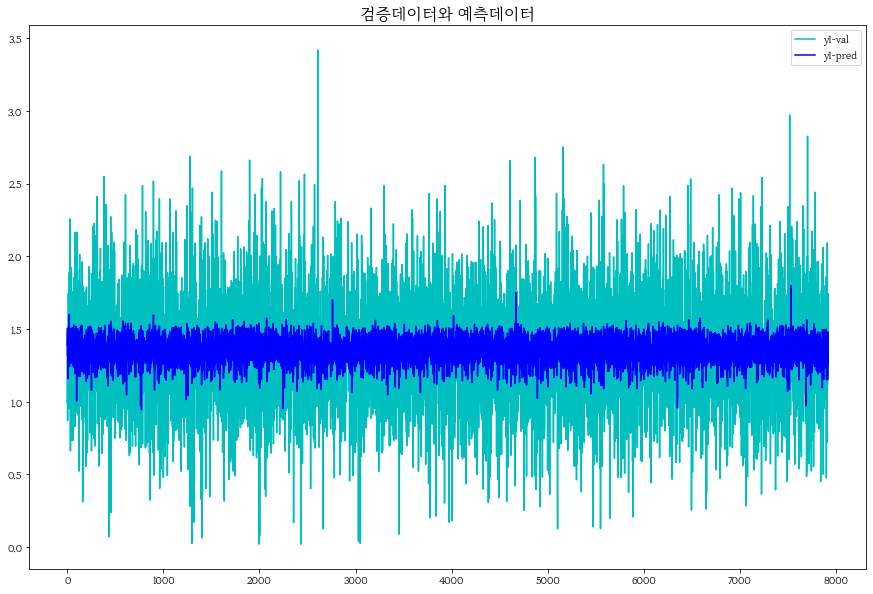

In [ ]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

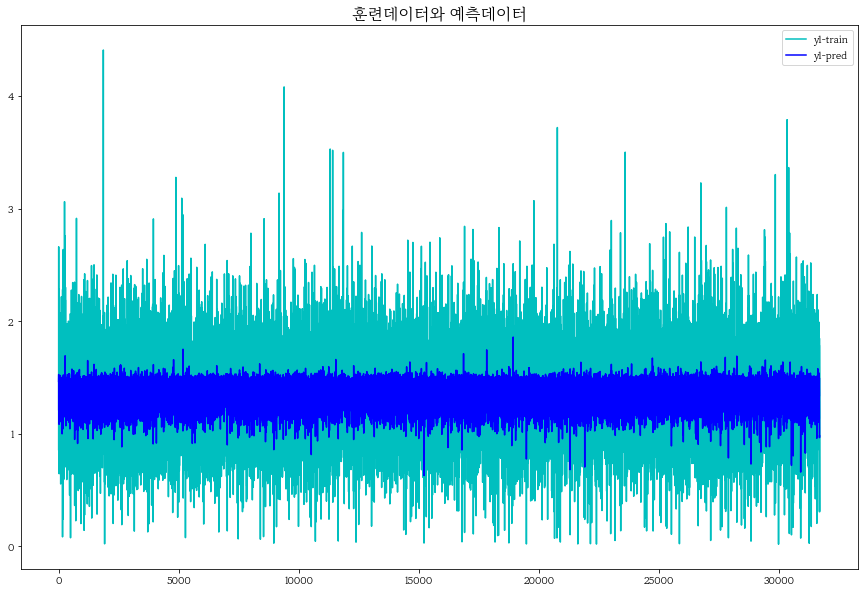

In [ ]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [48]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [49]:
gbr = GradientBoostingRegressor(max_depth= 10, n_estimators= 30, criterion="mse",learning_rate = 0.01, random_state=2022)
bgr = BaggingRegressor(n_estimators= 30, n_jobs = 5, random_state=2022)
xgbr = XGBRegressor(n_estimators= 30, learning_rate =0.01, random_state=2022, n_jobs = 5) 
rfr = RandomForestRegressor(max_depth= 10, n_estimators= 30, criterion="mse", random_state=2022)
lgbmr = LGBMRegressor(max_depth= 10, n_estimators= 30, learning_rate =0.01, random_state=2022)

In [51]:
seed_everything(2022)
estimators = [('gbr',gbr),('xgb',xgbr),('br',bgr),('lgb',lgbmr),('rfr',rfr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=gbr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [52]:
print('stacking model: ', stacking)
print('multioutput regressor model: ', model)
print('Done.')

stacking model:  StackingRegressor(cv=5,
                  estimators=[('gbr',
                               GradientBoostingRegressor(criterion='mse',
                                                         learning_rate=0.01,
                                                         max_depth=10,
                                                         n_estimators=30,
                                                         random_state=2022)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learnin...
          

In [54]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4521
Done.


In [55]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.951
lg_nrmse of LR (validation): 1.969


In [56]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

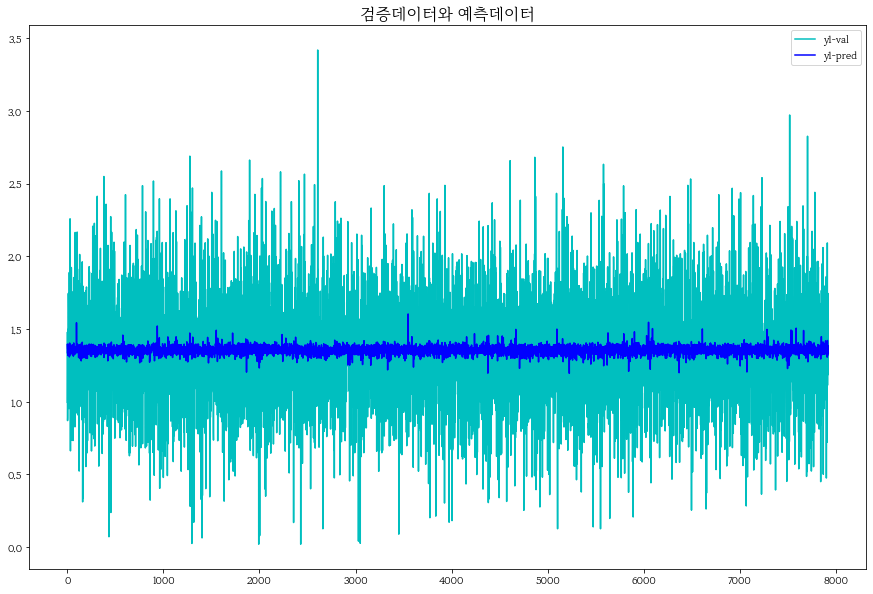

In [57]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

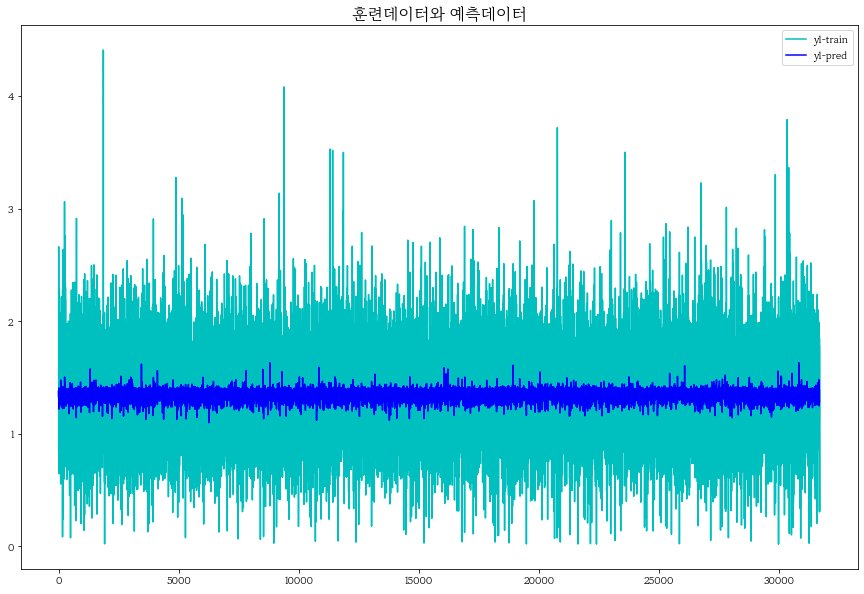

In [58]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [88]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [89]:
from catboost import CatBoostRegressor

rfr = RandomForestRegressor(max_depth= 16, n_estimators= 30, criterion="mse", random_state=2022)
lgbmr = LGBMRegressor(max_depth= 16, n_estimators= 30, learning_rate =0.01, random_state=2022)
etr = ExtraTreesRegressor(n_estimators= 30, random_state=2022, criterion='mse', max_depth=16)
cbr = CatBoostRegressor(eval_metric='RMSE', max_depth= 5, n_estimators= 30, learning_rate = 0.01, random_state=2022)

In [90]:
from sklearn.multioutput import MultiOutputRegressor
seed_everything(2022)
estimators = [('rfr',rfr),('lgb',lgbmr),('etr',etr),('cat',cbr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=cbr, cv = 5, passthrough = True, n_jobs=3)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('stacking model: ', stacking)
print('multioutput regressor model: ', model)
print('Done.')

0:	learn: 0.3566324	total: 7.65ms	remaining: 222ms
1:	learn: 0.3564923	total: 14ms	remaining: 197ms
2:	learn: 0.3563528	total: 19.9ms	remaining: 179ms
3:	learn: 0.3562140	total: 28ms	remaining: 182ms
4:	learn: 0.3560926	total: 35.3ms	remaining: 176ms
5:	learn: 0.3559529	total: 43ms	remaining: 172ms
6:	learn: 0.3558263	total: 49.8ms	remaining: 164ms
7:	learn: 0.3557012	total: 58.9ms	remaining: 162ms
8:	learn: 0.3555750	total: 66.1ms	remaining: 154ms
9:	learn: 0.3554640	total: 74.8ms	remaining: 150ms
10:	learn: 0.3553336	total: 81.1ms	remaining: 140ms
11:	learn: 0.3552167	total: 86.8ms	remaining: 130ms
12:	learn: 0.3550972	total: 93.1ms	remaining: 122ms
13:	learn: 0.3549921	total: 99.2ms	remaining: 113ms
14:	learn: 0.3548806	total: 106ms	remaining: 106ms
15:	learn: 0.3547698	total: 112ms	remaining: 97.8ms
16:	learn: 0.3546622	total: 119ms	remaining: 91.1ms
17:	learn: 0.3545585	total: 126ms	remaining: 83.7ms
18:	learn: 0.3544507	total: 131ms	remaining: 75.7ms
19:	learn: 0.3543386	total: 1

In [91]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4549
Done.


In [92]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.949
lg_nrmse of LR (validation): 1.971


In [93]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 14)

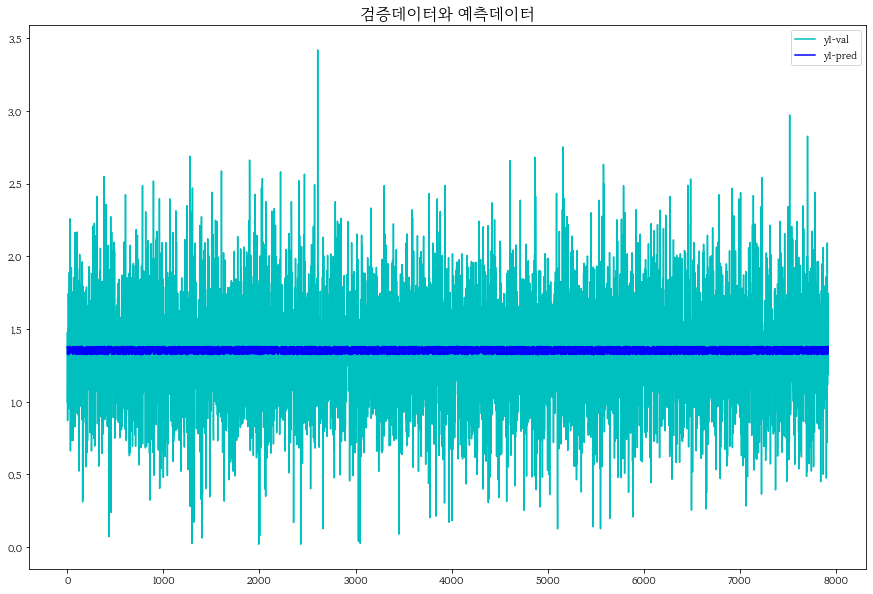

In [94]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 
plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

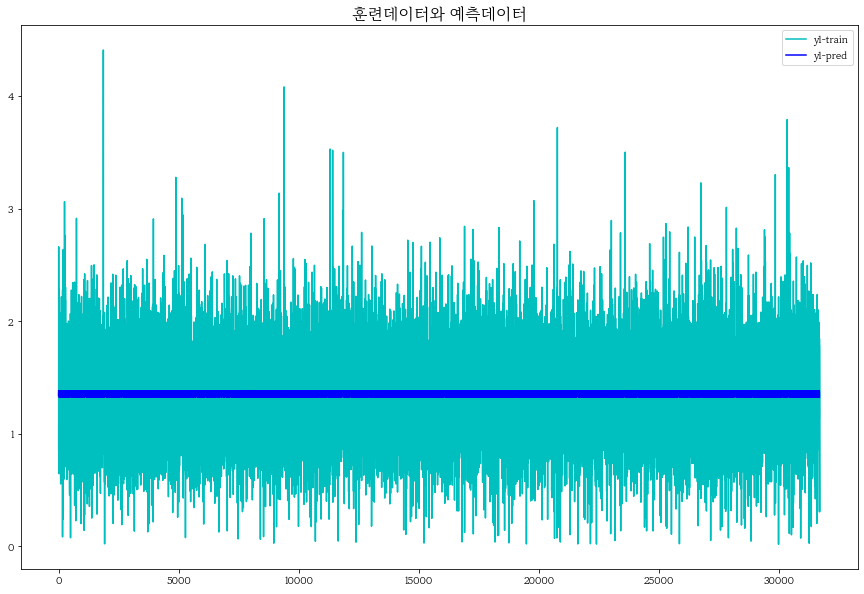

In [57]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [59]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [60]:
seed_everything(2022)
lgb_model = LGBMRegressor(max_depth= 30, n_estimators= 50, learning_rate =0.01, random_state=2022)
print(lgb_model)


model = MultiOutputRegressor(lgb_model).fit(X_train, y_train)
print('Done.')

LGBMRegressor(learning_rate=0.01, max_depth=30, n_estimators=50,
              random_state=2022)
Done.


In [61]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4484
Done.


In [62]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.98
lg_nrmse of LR (validation): 1.966


In [63]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [64]:
seed_everything(2022)
rfr_model = RandomForestRegressor(max_depth= 30, n_estimators= 50, criterion="mse", random_state=2022)
print(rfr_model)

model = MultiOutputRegressor(rfr_model).fit(X_train, y_train)
print('Done.')

RandomForestRegressor(max_depth=30, n_estimators=50, random_state=2022)


In [65]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4325
Done.


In [66]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of RF (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of RF (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of RF (training): 0.789
lg_nrmse of RF (validation): 1.956


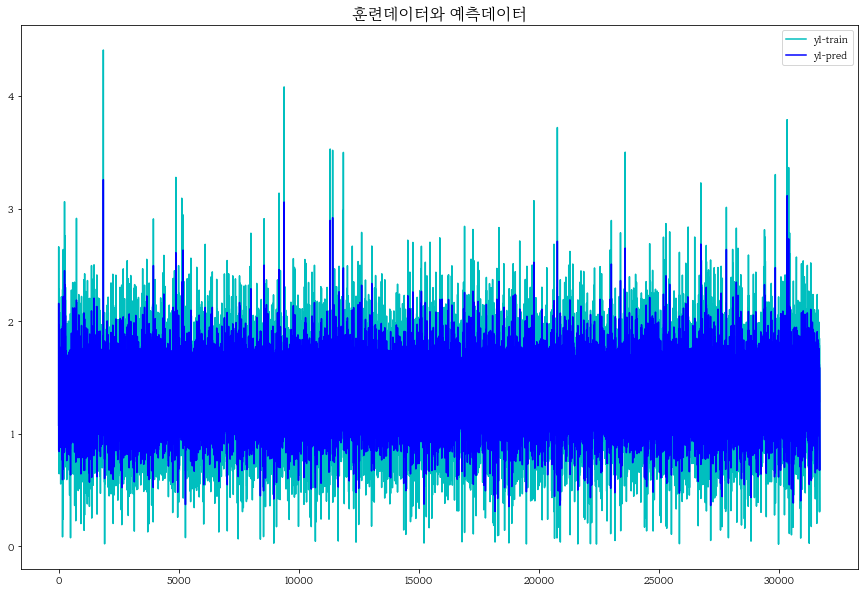

In [67]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

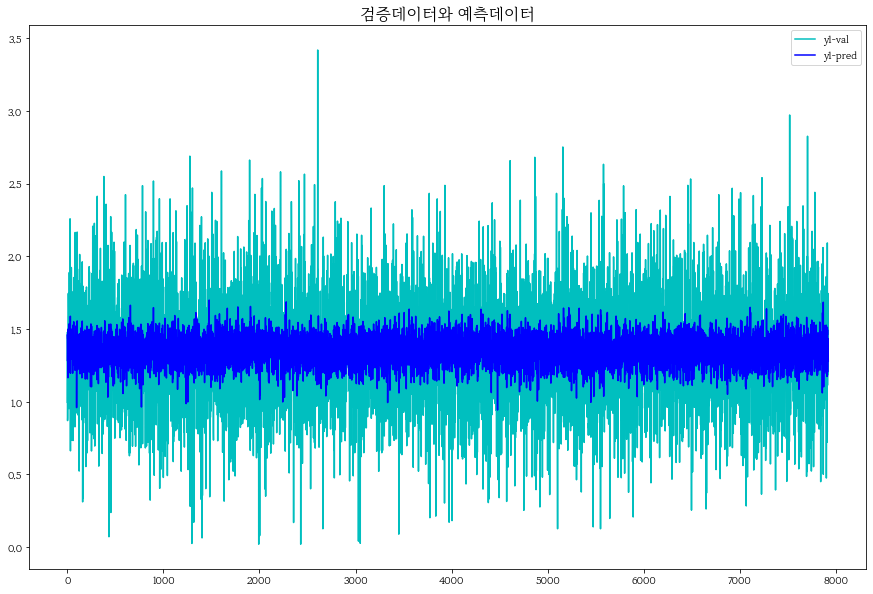

In [68]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 
plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [83]:
seed_everything(2022)
etr_model = ExtraTreesRegressor(n_estimators= 30, random_state=2022, criterion='mse', max_depth=15)
print(etr_model)

model = MultiOutputRegressor(etr_model).fit(X_train, y_train)
print('Done.')

ExtraTreesRegressor(max_depth=15, n_estimators=30, random_state=2022)
Done.


In [84]:
# 검증데이터 및 mse 성능 확인하기
preds = model.predict(X_val)

print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:1.4239
Done.


In [85]:
# 데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of RF (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of RF (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of RF (training): 1.404
lg_nrmse of RF (validation): 1.947


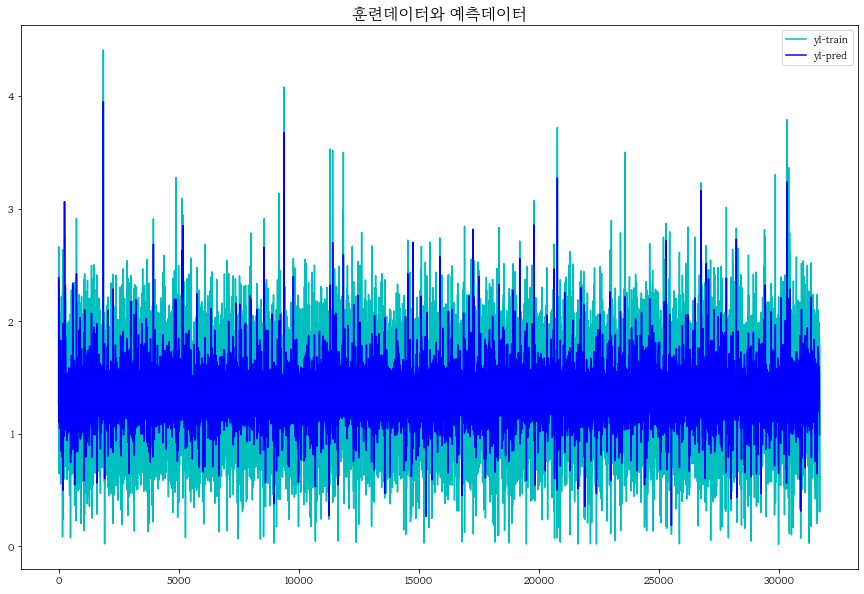

In [86]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

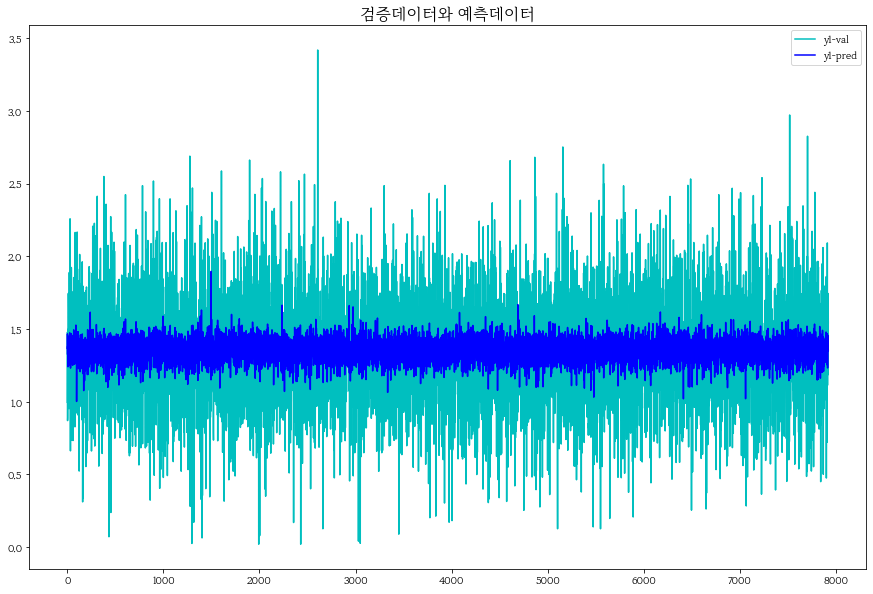

In [87]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 
plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [44]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 43), (7922, 43), (31685, 14), (7922, 14))

In [38]:
bgr = BaggingRegressor(n_estimators= 30, random_state=2022)
lgbmr = LGBMRegressor(max_depth= 15, n_estimators= 30, learning_rate =0.01, random_state=2022)
etr = ExtraTreesRegressor(n_estimators= 30, random_state=2022, criterion='mse', max_depth=15)

In [47]:
seed_everything(2022)
estimators = [('br',bgr),('lgb',lgbmr),('etr', etr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=etr, cv = 5, passthrough = True, n_jobs=3)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [48]:
print('stacking model: ', stacking)
print('multioutput regressor model: ', model)
print('Done.')

stacking model:  StackingRegressor(cv=5,
                  estimators=[('br',
                               BaggingRegressor(n_estimators=30,
                                                random_state=2022)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.01, max_depth=15,
                                             n_estimators=30,
                                             random_state=2022)),
                              ('etr',
                               ExtraTreesRegressor(max_depth=15,
                                                   n_estimators=30,
                                                   random_state=2022))],
                  final_estimator=ExtraTreesRegressor(max_depth=15,
                                                      n_estimators=30,
                                                      random_state=2022),
                  n_jobs=3, passthrough=True)
multioutput regressor model:  MultiOutpu

In [50]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print(f'lg_nrmse score of RF (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of RF (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of RF (training): 1.642
lg_nrmse of RF (validation): 1.945
y MSE(train):0.9126
y MSE(val):1.4157
Done.


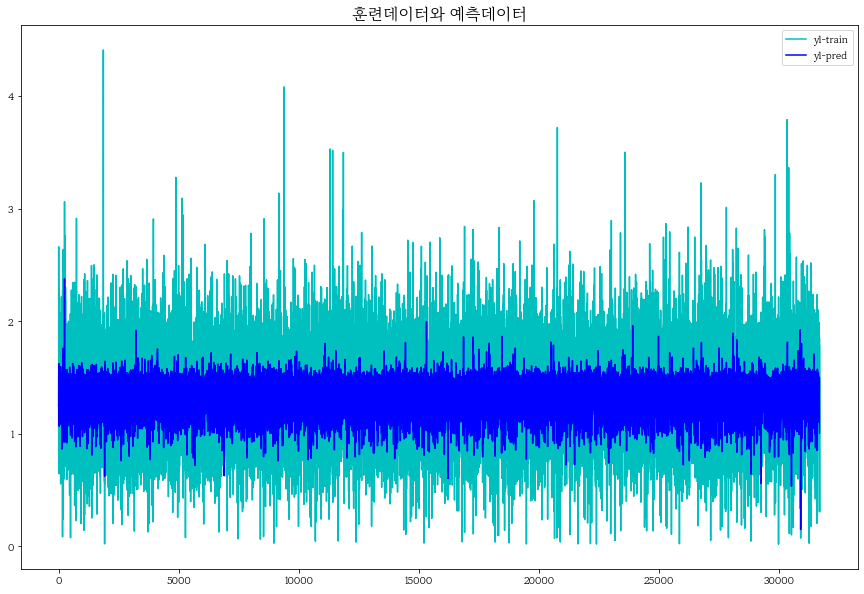

In [51]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

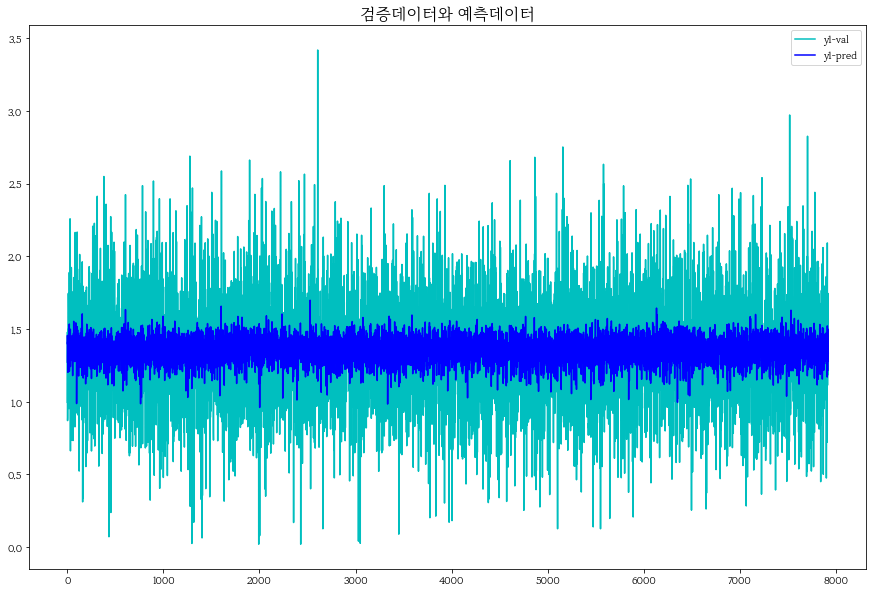

In [52]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 
plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [40]:
seed_everything(2022)
estimators = [('br',bgr),('lgb',lgbmr),('etr', etr)]

stacking = StackingRegressor(estimators=estimators, final_estimator=etr, cv = 5, passthrough = True, n_jobs=3)
model = MultiOutputRegressor(stacking).fit(train_x, train_y)
print('Done.')

Done.


In [42]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(train_x)

from sklearn.metrics import mean_squared_error
print(f'lg_nrmse score of stacking (total): {round(lg_nrmse(train_y.values, preds_tr), 3)}')
print("y MSE (total):%.4f" % mean_squared_error(train_y, preds_tr))
print('Done.')

lg_nrmse score of stacking (total): 1.628
y MSE (total):0.9471
Done.


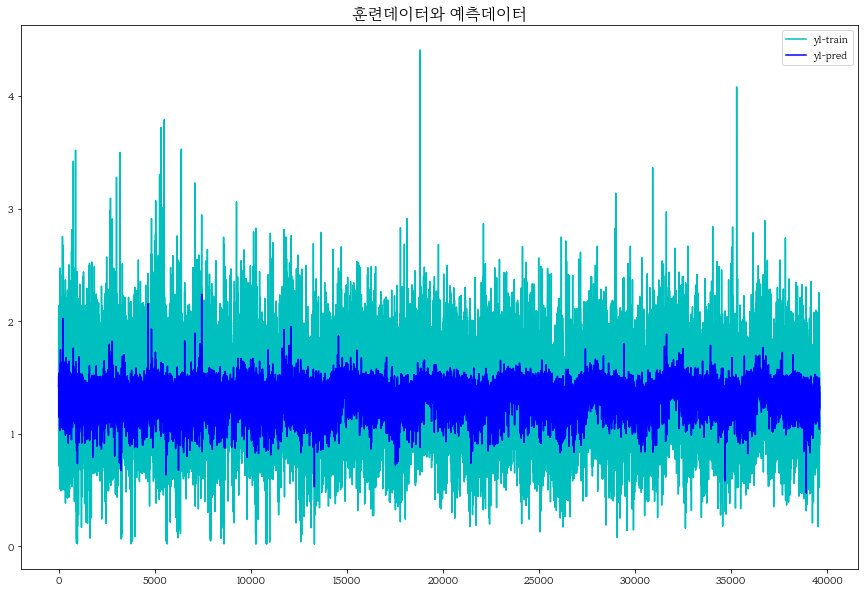

In [44]:
plt.figure(figsize=(15, 10))
x_ax = range(len(train_x))
plt.plot(x_ax, train_y.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [50]:
# 평가 데이터로 데이터 예측하기

preds_test = model.predict(new_fm1)

submission = pd.read_csv('./sample_submission.csv')

for idx, col in enumerate(submission.columns):
    if col=='ID': continue#submission[col] = new_fm1.index
    submission[col] = preds_test[:,idx-1]

submission.to_csv('./submit_after_treating_outliers_stacking2.csv', index=False, encoding='utf-8')
print('Done.')

pd.read_csv('./submit_after_treating_outliers_stacking2.csv')

Done.


,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,6.674148e+09,5.898698e+10,6.930978e+10,-7.004295e+10,1.439395e+11,1.247433e+11,-1.434180e+11,2.105974e+11,-4.101645e+10,-3.952136e+10,1.560166e+10,1.204986e+11,5.244800e+10,-5.482063e+10
1,TEST_00002,3.203798e+10,4.095497e+10,5.128615e+10,-1.993562e+11,-5.937790e+10,1.443904e+11,5.476919e+10,3.203354e+09,2.235285e+11,4.422483e+10,3.380369e+10,-2.399690e+10,-5.642635e+09,6.829095e+10
2,TEST_00003,5.097856e+10,-3.878788e+10,8.906565e+10,3.487230e+09,8.514597e+10,4.073753e+10,9.459594e+09,8.494288e+10,-2.046513e+11,-4.836945e+10,3.638171e+10,4.997376e+09,-3.903480e+10,-1.630720e+10
3,TEST_00004,2.045834e+10,-3.123490e+10,-2.962421e+10,-2.511731e+09,-4.585720e+10,1.084065e+10,1.620040e+11,-2.981702e+11,6.776168e+10,3.396118e+10,6.686907e+09,-5.554453e+10,-7.914818e+10,-8.001112e+10
4,TEST_00005,7.171615e+10,-3.524785e+09,7.337191e+10,-5.499322e+10,-7.740790e+10,1.478796e+10,1.455330e+11,-4.975376e+10,-5.816240e+10,-5.475229e+10,1.885464e+10,-5.680145e+10,-1.352551e+10,1.379954e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,TEST_39604,6.585063e+10,-1.226141e+10,-5.805004e+10,7.505068e+10,3.600051e+10,-1.033219e+11,-4.770924e+09,1.239340e+11,-1.373850e+11,1.866088e+10,-1.352745e+10,-2.972872e+10,1.055377e+10,6.432243e+10
39604,TEST_39605,4.390773e+10,1.022824e+10,-8.648273e+10,5.533412e+10,-2.083150e+10,-4.251357e+10,7.584488e+10,-6.907414e+10,1.687923e+09,7.620575e+10,-3.663214e+10,-8.664929e+10,-5.412217e+10,8.686071e+10
39605,TEST_39606,3.228438e+10,-3.929735e+10,-2.280474e+10,1.042470e+11,4.696334e+10,-6.234851e+10,3.558205e+10,-1.786512e+10,-1.406074e+11,1.949221e+10,-4.394757e+09,-1.867671e+10,-5.977980e+10,-1.098244e+10
39606,TEST_39607,-7.354533e+10,-3.328811e+10,1.665087e+11,2.174532e+11,1.872053e+11,1.815435e+10,-3.302350e+11,8.237703e+10,-8.178467e+10,4.071350e+10,-5.295756e+10,2.070632e+11,-1.923316e+10,3.340726e+11


In [61]:
df = pd.read_csv('./submit_after_treating_outliers_stacking2.csv')

train_x = new_fm1
train_y = df.filter(regex='Y')
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3, random_state=seed_everything(2022), shuffle=True)

seed_everything(2022)
bgr_model = BaggingRegressor(n_estimators= 50, n_jobs = 5, random_state=2022)
print(bgr_model)

model = MultiOutputRegressor(bgr_model).fit(X_train, y_train)
print('Done.')

BaggingRegressor(n_estimators=50, n_jobs=5, random_state=2022)
Done.


In [63]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print(f'lg_nrmse score of bagging (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of bagging (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of bagging (training): 2.08
lg_nrmse of bagging (validation): 5.368
y MSE(train):83052364864499924992.0000
y MSE(val):551540969866650451968.0000
Done.


In [48]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)

from sklearn.linear_model import SGDRegressor
seed_everything(2022)
sgdr = SGDRegressor(random_state=2022, learning_rate='adaptive', early_stopping=True, verbose=1,penalty='elasticnet', l1_ratio=0.8, max_iter=1000000)
print(sgdr)

model = MultiOutputRegressor(sgdr).fit(X_train, y_train)
print('Done.')

SGDRegressor(early_stopping=True, l1_ratio=0.8, learning_rate='adaptive',
             max_iter=1000000, penalty='elasticnet', random_state=2022,
             verbose=1)
-- Epoch 1
Norm: 4440099196746.96, NNZs: 43, Bias: -7598847876.133476, T: 28516, Avg. loss: 2264841138485143938923495424.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5616853749427.18, NNZs: 43, Bias: 6884673476.141968, T: 57032, Avg. loss: 2289111069699158054254149632.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 4158001148107.35, NNZs: 43, Bias: 34205098604.321365, T: 85548, Avg. loss: 2269354994069506066567135232.000000
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 4599429936390.29, NNZs: 43, Bias: 16744641208.869164, T: 114064, Avg. loss: 2276502560291251369770221568.000000
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 4957710925047.66, NNZs: 43, Bias: -33999271763.667114, T: 142580, Avg. loss: 2275813446242521069039648768.000000
Total training time: 0.06 seconds.
-- Epoch 6
No

In [49]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of RF (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of RF (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of RF (training): 308416888608.748
lg_nrmse of RF (validation): 307590520273.734
y MSE(train):9360316994303506251776.0000
y MSE(val):9297314672248932532224.0000
Done.
